In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

import spacy
from spacy import displacy

import pandas as pd
pd.set_option('max_colwidth', 1000)

In [2]:
%run ../script/webnlg.py

In [3]:
corpus = WebNLGCorpus.load('train')

In [9]:
corpus.mdf[corpus.mdf.m_predicate == 'related'].sample(2)

e1 = corpus.sample(idx='5_40')
e2 = corpus.sample(idx='13_0')

In [11]:
e1.lexes()

['The alternative name for asam pedas is asam padeh.',
 'Asam padeh is also known as Asam pedas.',
 'An alternative name for Asam pedas is Asam padeh.']

In [12]:
e2.lexes()

['Garlic is an ingredient used in Ajoblanco which originates from the country of Spain.',
 'Ajoblanco, containing the ingredient garlic, is from Spain.',
 "Garlic is an ingredient in the regional dish of Spain's Ajoblanco."]

In [17]:
s1 = e1.lexes()[0]
s2 = e2.lexes()[0]

In [16]:
nlp = spacy.load('en_core_web_lg')

In [18]:
doc1 = nlp(s1)
displacy.render(doc1, style='dep', jupyter=True)

In [19]:
doc2 = nlp(s2)
displacy.render(doc2, style='dep', jupyter=True)

In [20]:
import networkx as nx

In [21]:
g = nx.DiGraph()

for token in doc1:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)

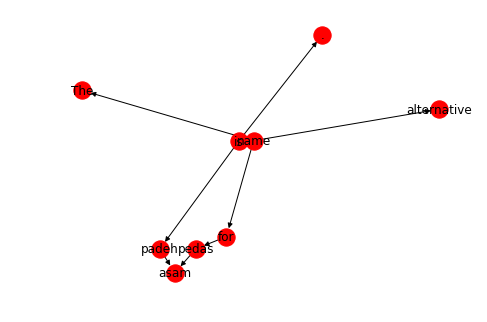

In [22]:
nx.draw(g, with_labels=True)

In [23]:
g = nx.DiGraph()

for token in doc1:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)
        
for token in doc2:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text)

In [24]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)

[('is', 0.23809523809523808),
 ('name', 0.19047619047619047),
 ('ingredient', 0.19047619047619047),
 ('originates', 0.14285714285714285),
 ('country', 0.14285714285714285),
 ('for', 0.09523809523809523),
 ('pedas', 0.09523809523809523),
 ('asam', 0.09523809523809523),
 ('padeh', 0.09523809523809523),
 ('used', 0.09523809523809523),
 ('in', 0.09523809523809523),
 ('from', 0.09523809523809523),
 ('of', 0.09523809523809523),
 ('The', 0.047619047619047616),
 ('alternative', 0.047619047619047616),
 ('.', 0.047619047619047616),
 ('Garlic', 0.047619047619047616),
 ('an', 0.047619047619047616),
 ('Ajoblanco', 0.047619047619047616),
 ('which', 0.047619047619047616),
 ('the', 0.047619047619047616),
 ('Spain', 0.047619047619047616)]

In [25]:
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)

[('asam', 0.10054824943767052),
 ('Ajoblanco', 0.07427870526416332),
 ('Spain', 0.07111259508772588),
 ('country', 0.061573204486935124),
 ('pedas', 0.05631059834400176),
 ('in', 0.05631059834400176),
 ('the', 0.052583840596457765),
 ('of', 0.052583840596457765),
 ('which', 0.04136283989874518),
 ('from', 0.04136283989874518),
 ('The', 0.035171596177990996),
 ('alternative', 0.035171596177990996),
 ('for', 0.035171596177990996),
 ('an', 0.035171596177990996),
 ('used', 0.035171596177990996),
 ('originates', 0.035171596177990996),
 ('name', 0.03090560590473227),
 ('padeh', 0.03090560590473227),
 ('.', 0.03090560590473227),
 ('Garlic', 0.03090560590473227),
 ('ingredient', 0.03090560590473227),
 ('is', 0.0264150814534886)]

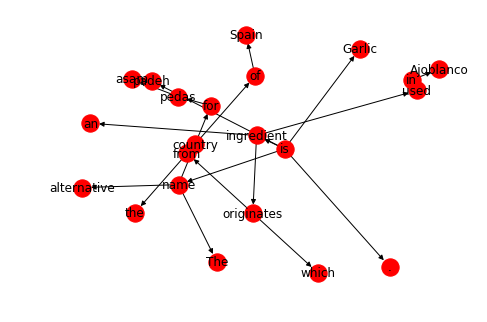

In [26]:
nx.draw(g, with_labels=True)

In [27]:
g = nx.DiGraph()

for lexe_set in corpus.ldf.ltext:
    
    doc = nlp(lexe_set)
    
    for token in doc:
    
        if token.dep_ != 'ROOT':
        
            g.add_edge(token.head.text, token.text)

In [28]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[:10]

[('is', 0.44393673110720566),
 ('of', 0.2998242530755712),
 ('in', 0.2325131810193322),
 (',', 0.21423550087873464),
 ('and', 0.1912126537785589),
 ('has', 0.16502636203866433),
 ('the', 0.16362038664323375),
 ('are', 0.11528998242530757),
 ('.', 0.10017574692442884),
 ('by', 0.09613356766256591)]

In [29]:
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)[:10]

[('-', 0.034269829731378355),
 ('0', 0.022499675557462444),
 ('the', 0.0210480655084224),
 (',', 0.018763622913935754),
 ('and', 0.01741163449769588),
 ('of', 0.01419168611785918),
 ('in', 0.011831727202104495),
 ('.', 0.009475520515072661),
 ('also', 0.008774152626904204),
 ('The', 0.008703214184876195)]

In [30]:
sorted(nx.betweenness_centrality(g).items(), key=lambda x: x[1], reverse=True)[:10]

[('is', 0.18923487157898383),
 ('of', 0.12488550906708339),
 ('in', 0.09337814375500672),
 ('has', 0.03335037214376785),
 ('as', 0.02359543309475082),
 ('are', 0.021280347558126557),
 (',', 0.01857317289102661),
 ('the', 0.017981947767716104),
 ('was', 0.016141628856360876),
 ('by', 0.014341030709220336)]